### Quiz 1 - Machine Learning
### Submitted By: Stuti Sanghavi

## Exploratory Data Analysis

In [1]:
# Importing all the required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('gmc_pickup.csv')

In [3]:
# Checking the head of the dataset
df.head()

,X,Y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [4]:
# Number of rows in the dataset
len(df)

23

In [5]:
# There are 23 rows and 2 columns in the dataset
df.shape

(23, 2)

In [6]:
# Looking at statistical details of the dataset
df.describe()

,X,Y
count,23.000000,23.000000
mean,17.465217,15.300000
std,2.413901,2.057580
min,12.400000,11.200000
25%,15.800000,14.050000
50%,17.299999,15.100000
75%,19.300000,16.849999
max,22.400000,19.600000


In [33]:
# Renaming the X and Y variables
df.rename(columns={'X':'List_Price','Y':'Best_Price'}, inplace=True)
df.head()

,List_Price,Best_Price
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


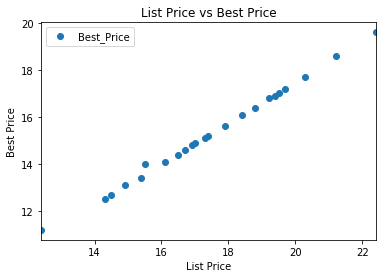

In [9]:
# Plotting the datapoints
df.plot(x='List_Price', y='Best_Price', style='o')  
plt.title('List Price vs Best Price')  
plt.xlabel('List Price')  
plt.ylabel('Best Price')  
plt.show()

## Question 1: Build a simple linear model

In [10]:
# In our dataset, we only have two columns. We want to predict the Best Price given the List Price.
# Therefore our attribute set will consist of the “List Price” column which is stored in the X variable, and the label 
# will be the “Best Price” column which is stored in y variable.
X = df['List_Price'].values.reshape(-1,1)
y = df['Best_Price'].values.reshape(-1,1)

In [11]:
# Next, we split 90% of the data to the training set while the remaining 10% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [12]:
# Out of the 23 rows, 20 rows of the data are used for training the data
X_train.shape

(20, 1)

In [13]:
# Remaining 3 rows used for testing data
X_test.shape

(3, 1)

In [14]:
# Same split as above applied on the y variable as well
y_train.shape

(20, 1)

In [15]:
y_test.shape

(3, 1)

In [16]:
# Importing LinearRegression class and calling fit on the training data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Question 2

### 2.1 Predict y for a given x = 25
### 2.2 Predict y for a given x = 11

In [17]:
# Getting the intercept and slope values
b0 = regressor.intercept_[0]
b1 = regressor.coef_[0][0]
print('The intercept is ' + str(b0))
print ('The coefficient is ' + str(b1))

The intercept is 0.4208790300426468
The coefficient is 0.8520922161342361


In [18]:
# Calculating y, when X = 25
y = b0 + b1*(25)
print('The predicted value of Best Price(y) is ' + str(round(y,2)) + ' when the List price(x) is 25')

The predicted value of Best Price(y) is 21.72 when the List price(x) is 25


In [19]:
# Calculating y when X = 11
y = b0 + b1*(11)
print('The predicted value of Best Price(y) is ' + str(round(y,2)) + ' when the List price(x) is 11')

The predicted value of Best Price(y) is 9.79 when the List price(x) is 11


In [20]:
# Verifying the above values
print(regressor.predict([[25]])[0][0])
regressor.predict([[11]])[0][0]

21.72318443339855


9.793893407519244

In [21]:
# Calculating predicted value of y for train and test data
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [22]:
# Comparing actual and predicted values of the test data
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test.flatten()})
df1

,Actual,Predicted
0,17.700001,17.718350
1,16.400000,16.440212
2,17.200001,17.207096


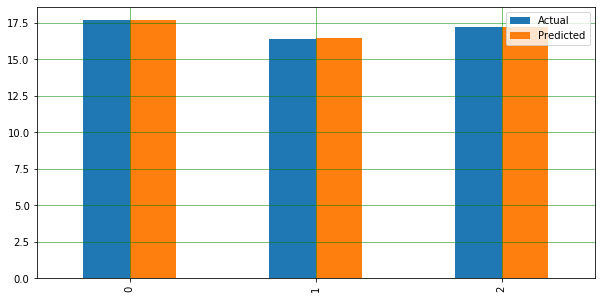

In [23]:
# Visualizing comparisions of actual and predicted values on the test data
df2 = df1.head()
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

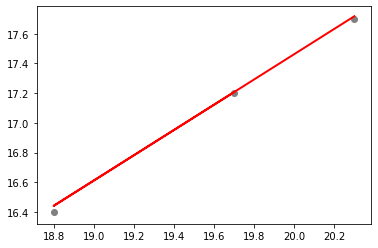

In [24]:
# Plotting the straight line with our test data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.show()

## Question 3: Calculating Mean Absolute Error (MAE) of your model

In [25]:
# Calculating mean absolute error on the train data
mae_train = abs(y_pred_train - y_train).mean()
print('The Mean Absolute Error for train data is ' + str(round(mae_train,2)))

The Mean Absolute Error for train data is 0.08


In [26]:
# Calculating Mean absolute error on the test data
mae_test = abs(y_pred_test - y_test).mean()
print('The Mean Absolute Error for test data is ' + str(round(mae_test,2)))

The Mean Absolute Error for test data is 0.02


In [34]:
# Verifying above answers
print('Mean Absolute Error for train data:', round(metrics.mean_absolute_error(y_train, y_pred_train),2))
print('Mean Absolute Error for test data:', round(metrics.mean_absolute_error(y_test, y_pred_test),2))

Mean Absolute Error for train data: 0.08
Mean Absolute Error for test data: 0.02


## Question 4 : What is the accuracy of the model

In [37]:
# For accuracy, we will look at the Root mean squared error and R square

# RMSE for train data
print('Root Mean Squared Error for train data:', 
      np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))  
# RMSE for test data
print('Root Mean Squared Error for test data:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
#R square for train data
print('R-square for train data:', metrics.r2_score(y_train, y_pred_train, sample_weight=None, multioutput='uniform_average'))
#R square for test data
print('R-square for test data:', metrics.r2_score(y_test, y_pred_test, sample_weight=None, multioutput='uniform_average'))

Root Mean Squared Error for train data: 0.11618441783069502
Root Mean Squared Error for test data: 0.025846305761089514
R-square for train data: 0.9966711503700153
R-square for test data: 0.9976696618078309


### Conclusion: 

- The value of root mean squared error is 0.025 for test data and 0.11 for train data, which is way less than 10% of the mean value of Y(i.e. the Best Price). 
- We also see that R-square value from the model is around 0.997 for test data and 0.996 for train data which is very close to 1. 
- From these, we can deduce that our algorithm is very accurate and can make reasonably good predictions.